# Illustration de la progressivité de l'impôt sur le revenu

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.

In [20]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
from openfisca_france import FranceTaxBenefitSystem   # classe décrivant le système socio-fiscal français

tax_benefit_system = FranceTaxBenefitSystem() # Création d'une instance du système socio-fiscal français

## Concavité de l'impôt

In [22]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 300,
            min = 0,
            max = 50000,
            name = 'salaire_imposable',
            ),
        ],
    period = 2014,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        )
    ).new_simulation(debug = True)

In [23]:
salaire_imposable = simulation.calculate('salaire_imposable')
impot = - simulation.calculate('impo')

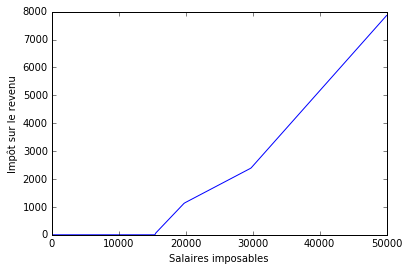

In [24]:
plt.plot(salaire_imposable, impot)
plt.ylabel(u"Impôt sur le revenu")
plt.xlabel(u"Salaires imposables")

L'impôt payé est continu: il n'augmente brusquement son impôt lorsque l'on change de tranche contrairement 
à ce que pensent beaucoup de personnes.

## Taux moyen

In [25]:
taux_moyen = impot / salaire_imposable  

/home/benjello/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [26]:
taux_moyen = impot / (salaire_imposable * (salaire_imposable != 0) + (salaire_imposable == 0) )  

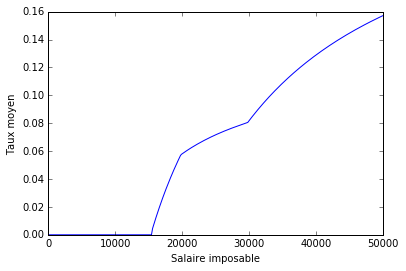

In [14]:
plt.plot(salaire_imposable, taux_moyen)
plt.ylabel("Taux moyen")
plt.xlabel("Salaire imposable")

## Taux marginal

In [15]:
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire_imposable[:-1] - salaire_imposable[1:] ) 

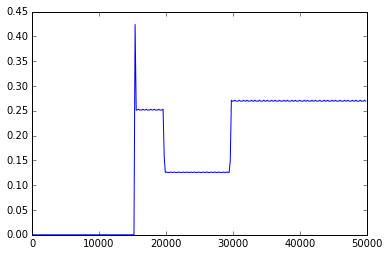

In [36]:
plt.plot(salaire_imposable[:-1], taux_marginal)

In [37]:
taux_marginal[40], taux_marginal[95]

(-0.0, 0.25320974)

On retrouve les atux marginaux des tranches à 14% et à 30% (il ne faut pas oublier l'abattement de 10% pour frais professionnels)

### Remarque: utilisation de fonction dédiées

Il est possible d'utiliser des fonctions dédiées au calcul des taux marginaux et des taux moyens payés sur certaines concept de revenus. On reproduit ci-dessous 

In [16]:
from openfisca_core.rates import average_rate, marginal_rate

In [17]:
revenu_apres_impot = simulation.calculate('revenu_net_individu') + simulation.calculate('impo') 

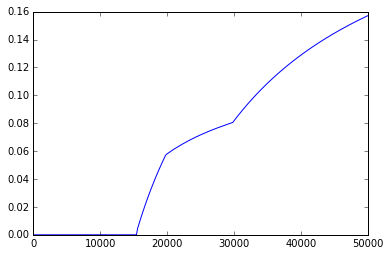

In [18]:
plt.plot(salaire_imposable[1:], average_rate(revenu_apres_impot[1:], salaire_imposable[1:]))

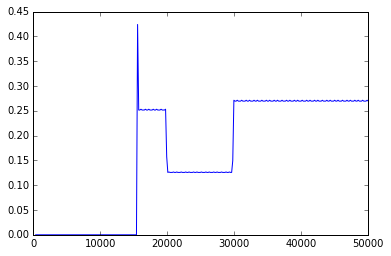

In [19]:
plt.plot(salaire_imposable[2:], marginal_rate(revenu_apres_impot[1:], salaire_imposable[1:]))

Exercice: montrer que le taux moyen tend vers le taux marginal à l'infini